# Credit Card Fraud Detection using Random Forest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load Dataset

In [ ]:
df=pd.read_csv("creditcard.csv",sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(109025, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109025 entries, 0 to 109024
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    109025 non-null  int64  
 1   V1      109025 non-null  float64
 2   V2      109025 non-null  float64
 3   V3      109025 non-null  float64
 4   V4      109025 non-null  float64
 5   V5      109025 non-null  float64
 6   V6      109025 non-null  float64
 7   V7      109025 non-null  float64
 8   V8      109025 non-null  float64
 9   V9      109025 non-null  float64
 10  V10     109025 non-null  float64
 11  V11     109025 non-null  float64
 12  V12     109025 non-null  float64
 13  V13     109025 non-null  float64
 14  V14     109025 non-null  float64
 15  V15     109025 non-null  float64
 16  V16     109025 non-null  float64
 17  V17     109025 non-null  float64
 18  V18     109025 non-null  float64
 19  V19     109025 non-null  float64
 20  V20     109025 non-null  float64
 21  V21     10

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,...,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000
mean,44645.276707,-0.256883,-0.025148,0.682026,0.156138,-0.283840,0.096437,-0.115878,0.058907,-0.058148,...,-0.031439,-0.108487,-0.037077,0.010548,0.133002,0.025850,0.001697,0.001575,95.976655,0.002192
std,17910.956447,1.851918,1.646552,1.312689,1.342222,1.345002,1.297956,1.204303,1.228831,1.107857,...,0.739326,0.639778,0.625171,0.595426,0.439685,0.491488,0.392049,0.319122,259.985100,0.046770
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,34466.000000,-1.022536,-0.594704,0.176662,-0.711427,-0.906796,-0.647201,-0.604942,-0.134455,-0.698260,...,-0.224526,-0.535608,-0.176381,-0.323376,-0.130809,-0.323685,-0.061028,-0.004984,7.000000,0.000000
50%,46486.000000,-0.260725,0.078851,0.757593,0.184474,-0.318199,-0.156136,-0.071019,0.077647,-0.124576,...,-0.057137,-0.084788,-0.049097,0.066487,0.170840,-0.068262,0.010695,0.023386,25.000000,0.000000
75%,59079.000000,1.155066,0.739987,1.381997,1.021482,0.243535,0.490683,0.410307,0.368885,0.536933,...,0.120029,0.312712,0.080875,0.407577,0.420394,0.293750,0.084706,0.076715,86.982500,0.000000
max,71184.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


# Preprocessing the dataset

In [ ]:
# Check the null values

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df=df.fillna(method='ffill')

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.206335,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.358818,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.087317,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.105867,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.099955,0.0


In [ ]:
df.shape

(109025, 31)

In [ ]:
# Check duplicate data
df.duplicated().sum()

429

In [ ]:
# Remove duplicate data
df=df.drop_duplicates()

In [ ]:
df.shape

(108596, 31)

In [ ]:
# Get Fraud and Normal datasets

fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [ ]:
print (fraud.shape,normal.shape)

(234, 31) (108362, 31)


In [ ]:
df['Class'].value_counts()

0.0    108362
1.0       234
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

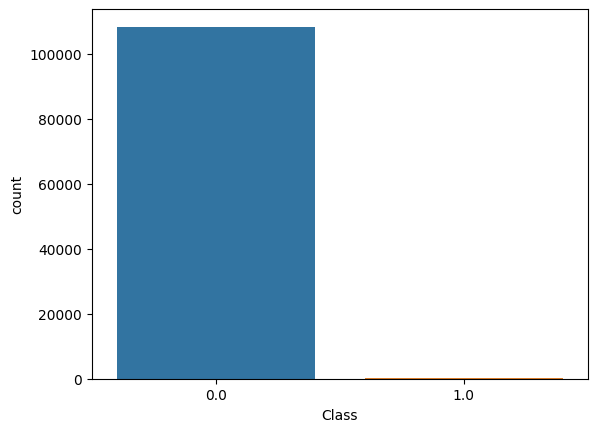

In [ ]:
sns.countplot(x='Class',data=df)

<Axes: >

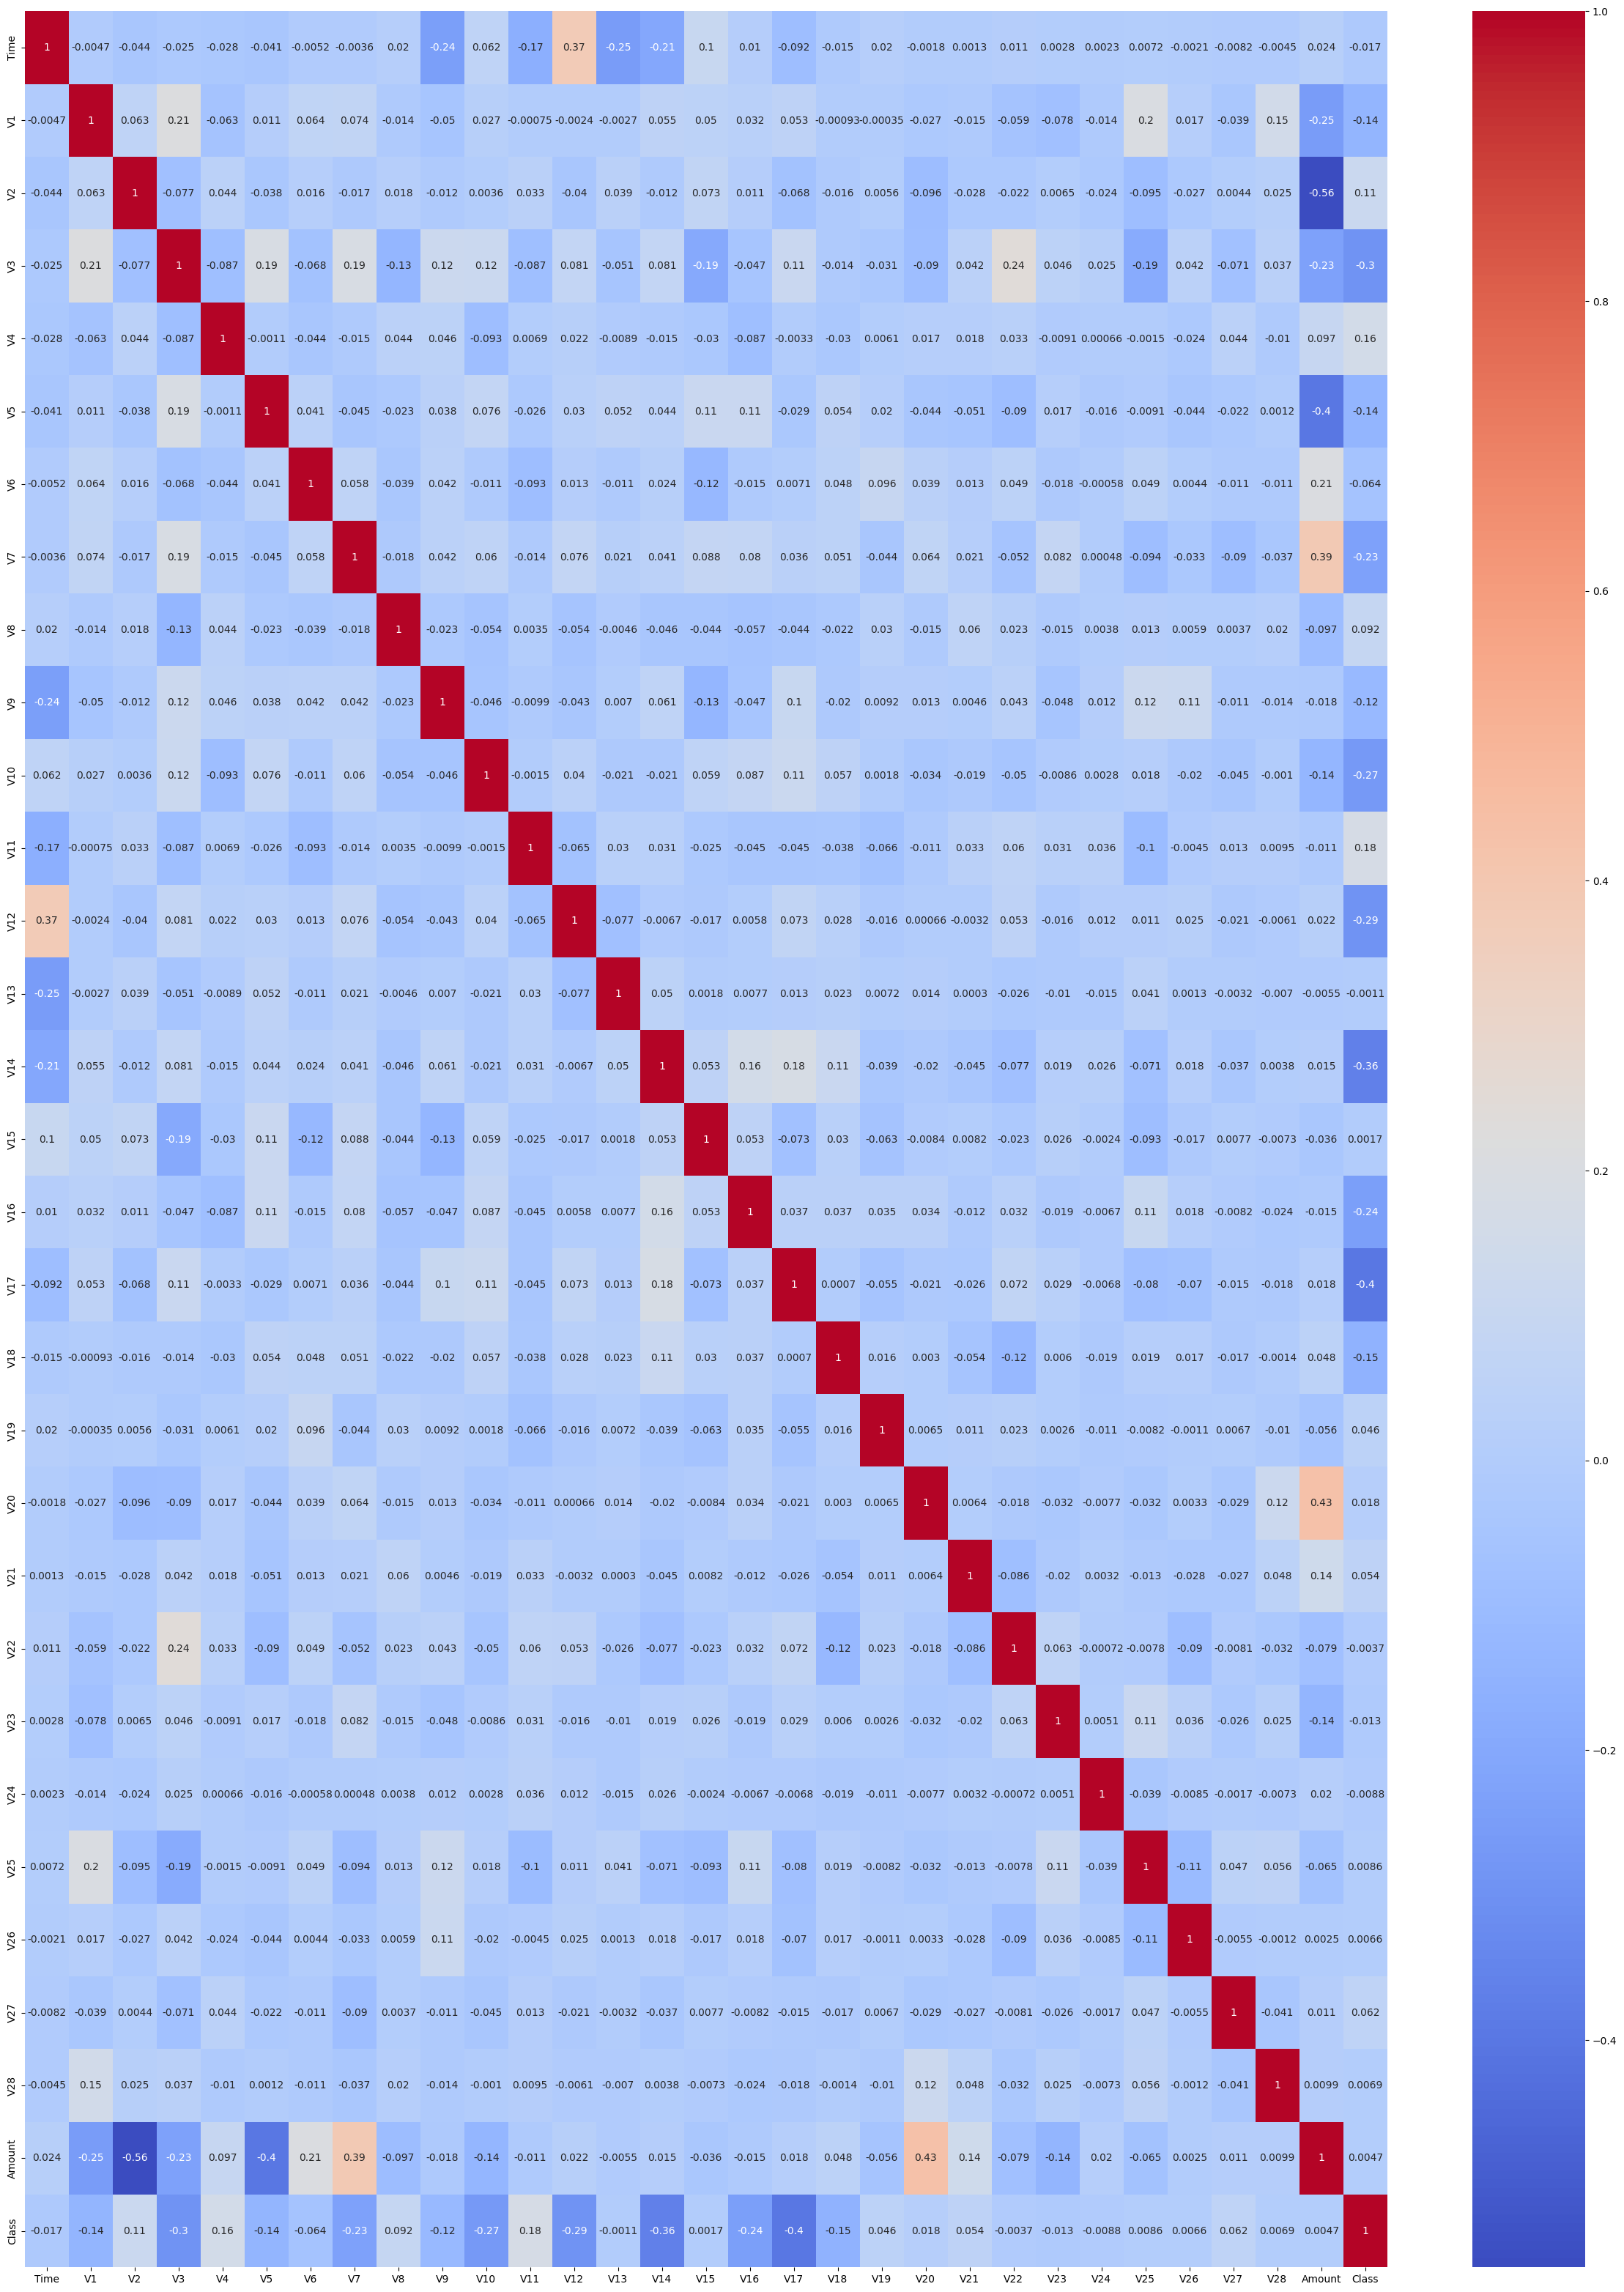

In [ ]:
corr=df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
# store feature matrix in x and response in vector y
x=df.drop('Class',axis=1)
y=df['Class']

# Splitting the dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,f1_score,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9988029465930018

In [ ]:
precision_score(y_test,y_pred)

0.8571428571428571

In [ ]:
f1_score(y_test,y_pred)

0.6976744186046512

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf1=RandomForestClassifier()

In [ ]:
model_rf1.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf1 = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf1)

0.9988029465930018

In [ ]:
precision_score(y_test,y_pred_rf1)

0.8571428571428571

In [ ]:
f1_score(y_test,y_pred_rf1)

0.6976744186046512

# Handling Imbalanced Dataset

UNDER SAMPLING

In [ ]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [ ]:
normal.shape,fraud.shape

((108362, 31), (234, 31))

In [ ]:
normal_sample=normal.sample(n=437)

In [ ]:
normal_sample.shape

(437, 31)

In [ ]:
new_df=pd.concat([normal_sample,fraud],ignore_index=True)

In [ ]:
new_df['Class'].value_counts()

0.0    437
1.0    234
Name: Class, dtype: int64

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,48746,-0.495983,0.341468,2.458263,2.166150,-0.261086,1.179711,0.426074,0.206125,-0.221725,...,0.134378,0.653657,-0.134808,0.034893,0.207564,0.144028,-0.129634,-0.195366,0.022477,0.0
1,63165,0.744732,1.738965,-1.662594,1.697091,1.086207,-1.563390,0.968863,-0.233220,-0.550910,...,-0.085533,0.104070,0.134852,0.085676,-0.538096,-0.395541,0.282428,0.017068,-0.365742,0.0
2,42660,1.040433,0.037515,0.756178,1.377370,-0.486409,-0.244711,-0.003855,-0.009925,0.368895,...,-0.172117,-0.360330,0.050528,0.411044,0.406362,-0.523693,0.050216,0.036391,-0.162651,0.0
3,47851,1.242137,0.307156,-0.067876,0.941056,0.182319,-0.462840,0.305474,-0.241228,-0.100707,...,0.002268,0.030819,-0.242243,-0.429369,0.818061,-0.282240,0.012628,0.019241,-0.229579,0.0
4,40886,0.255614,-1.954111,0.709218,0.571091,-1.791130,-0.042281,-0.200197,0.121911,1.026627,...,0.101549,-0.587465,-0.305000,0.606560,-0.125344,0.866390,-0.131422,0.084968,1.450764,0.0


In [ ]:
x=new_df.drop('Class',axis=1)
y=new_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

# Model training


# Logistic Regression after undersampling

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()


In [ ]:
# Training the Logistic Regression model with training data
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9481481481481482

In [ ]:
precision_score(y_test,y_pred)

0.9130434782608695

In [ ]:
recall_score(y_test,y_pred)

0.9333333333333333

In [ ]:
f1_score(y_test,y_pred)

0.9230769230769231

# Random Forest Classifier after undersampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier()

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=model_rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9851851851851852

In [ ]:
precision_score(y_test,y_pred_rf)

0.9777777777777777

In [ ]:
recall_score(y_test,y_pred_rf)

0.9777777777777777

In [ ]:
f1_score(y_test,y_pred_rf)

0.9777777777777777

# Final data after under sampling

In [ ]:
final_result=pd.DataFrame({'Models':['Log.R','Rand.Fr'],
                           "Accuracy":[accuracy_score(y_test,y_pred)*100,
                                 accuracy_score(y_test,y_pred_rf)*100]})

In [ ]:
final_result

,Models,Accuracy
0,Log.R,94.814815
1,Rand.Fr,98.518519


<Axes: xlabel='Models', ylabel='Accuracy'>

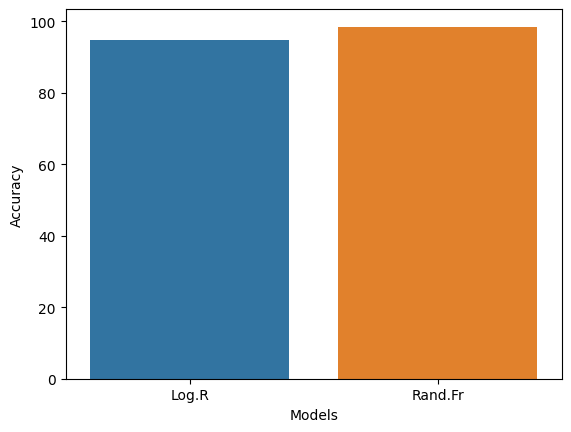

In [ ]:
sns.barplot(x='Models', y='Accuracy', data=final_result)

#  Handling Imbalanced Dataset
 OVER SAMPLING

In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
x.shape,y.shape

((108596, 30), (108596,))

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

0.0    108362
1.0    108362
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

# Logistic Regression after oversampling

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9988029465930018

In [ ]:
precision_score(y_test,y_pred)

0.8571428571428571

In [ ]:
recall_score(y_test,y_pred)

0.5882352941176471

In [ ]:
f1_score(y_test,y_pred)

0.6976744186046512

# Random Forest Classifier after undersampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=model_rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9995061423544663

In [ ]:
precision_score(y_test,y_pred_rf)

1.0

In [ ]:
recall_score(y_test,y_pred_rf)

0.7714285714285715

In [ ]:
f1_score(y_test,y_pred_rf)

0.870967741935484

In [ ]:
final_result=pd.DataFrame({'Models':['Log.R','Rand.Fr'],"Accuracy":[accuracy_score(y_test,y_pred)*100,
accuracy_score(y_test,y_pred_rf)*100]})

In [271]:
final_result

,Models,Accuracy
0,Log.R,94.814815
1,Rand.Fr,98.518519


<Axes: xlabel='Models', ylabel='Accuracy'>

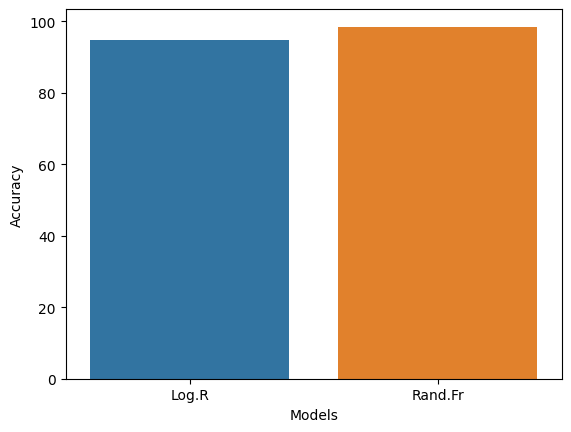

In [270]:

sns.barplot(x='Models', y='Accuracy', data=final_result)